Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
https://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [462]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [463]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [464]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias=True)
PHI = np.array(poly.fit_transform(X))
print(PHI)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [465]:
from numpy import linalg

w = np.dot(linalg.inv(np.dot(np.transpose(PHI), PHI)), np.dot(np.transpose(PHI), y))
print(w)

w = np.dot(linalg.pinv(PHI), y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Actual: [4 1 2 5]
Predicted: [2.2        2.65714286 3.11428571 4.02857143]
Mean squared error: 2.0428571428571427


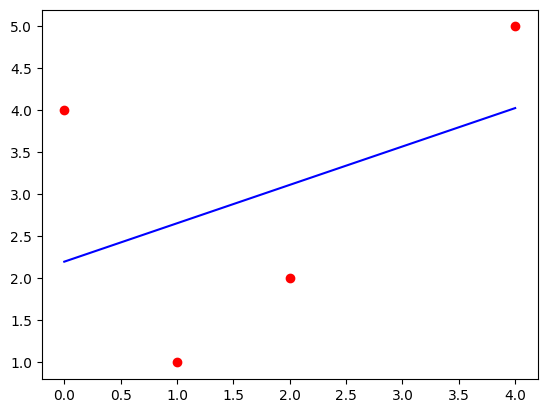

In [466]:
from sklearn.metrics import mean_squared_error

y_predicted = np.dot(PHI, w)
print("Actual: {}".format(y))
print("Predicted: {}".format(y_predicted))

print("Mean squared error: {}".format(mean_squared_error(y, y_predicted)))

plt.plot(X, y_predicted, 'b')
plt.plot(X, y, 'ro')
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [467]:
try:
    linalg.inv(PHI)
except linalg.LinAlgError as error:
    print("Matrix is not square error: {}".format(error))
    print()


# (N=4, n+1=4, n=3)
PHI_higher_dimension = np.array(PolynomialFeatures(degree=3, include_bias=True).fit_transform(X))

print("Example with degree=3")
print(PHI_higher_dimension)
print()

print("New weights")
print(np.dot(linalg.inv(PHI_higher_dimension), y))

Matrix is not square error: Last 2 dimensions of the array must be square

Example with degree=3
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]

New weights
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

PolynomialFeatures weights: w_0=2.200000, w_1=0.457143
LinearRegression weights: w_0=2.200000, w_1=0.457143

PolynomialFeatures prediction: [2.2        2.65714286 3.11428571 4.02857143]
LinearRegression prediction: [2.2        2.65714286 3.11428571 4.02857143]


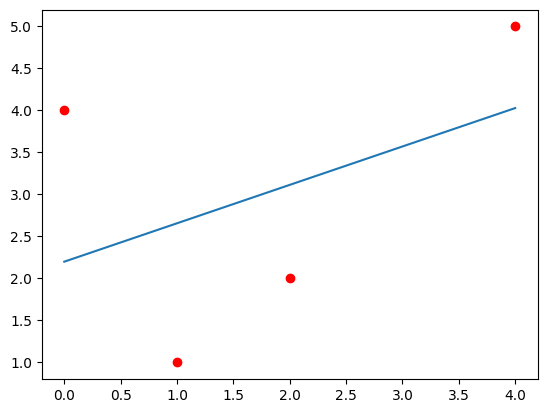

In [468]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
print("PolynomialFeatures weights: w_0={:.6f}, w_1={:.6f}".format(w[0], w[1]))
print("LinearRegression weights: w_0={:.6f}, w_1={:.6f}".format(reg.intercept_, reg.coef_[0]))
print()
print("PolynomialFeatures prediction: {}".format(y_predicted))
print("LinearRegression prediction: {}".format(reg.predict(X)))

plt.plot(X, y, 'ro')
plt.plot(X, reg.predict(X))
plt.show()

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [469]:
from numpy.random import normal

def make_labels(x_, f_, noise_=0):
    labels_ = []
    for example_ in x_:
        labels_.append(f_(example_) + normal(0, noise_))

    return labels_

In [470]:
def make_instances(min_, max_, num_) :
    return np.array([np.array([x_]) for x_ in np.linspace(min_, max_, num_)])

In [471]:
N = 50
noise = 200
f = lambda x_: 5 + x_ - 2 * np.power(x_, 2) - 5 * np.power(x_, 3)
X = make_instances(-5, 5, N)
y = make_labels(X, f, noise)

print("Generated labels")
print(y)

Generated labels
[array([638.99227143]), array([524.05524463]), array([1013.93459473]), array([258.88298711]), array([467.23365014]), array([301.31371066]), array([287.01809901]), array([-109.3777289]), array([96.56927473]), array([306.57629387]), array([-193.15211079]), array([259.87521211]), array([134.64791872]), array([-260.58452941]), array([-69.4849419]), array([-83.53282118]), array([-27.46548052]), array([-146.61167415]), array([104.89247541]), array([-95.42148892]), array([-95.15253401]), array([-165.57441926]), array([129.08205922]), array([175.69871595]), array([1.68558883]), array([-80.00196366]), array([108.37763319]), array([-441.38891966]), array([252.47748558]), array([359.32941116]), array([-380.03236409]), array([-308.03422359]), array([15.77692774]), array([81.18530312]), array([-43.2437363]), array([-125.53841091]), array([86.49160096]), array([142.59558155]), array([75.75626658]), array([-86.37426755]), array([-317.52136183]), array([-388.08728971]), array([-181.83

Prikažite taj skup funkcijom [`scatter`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

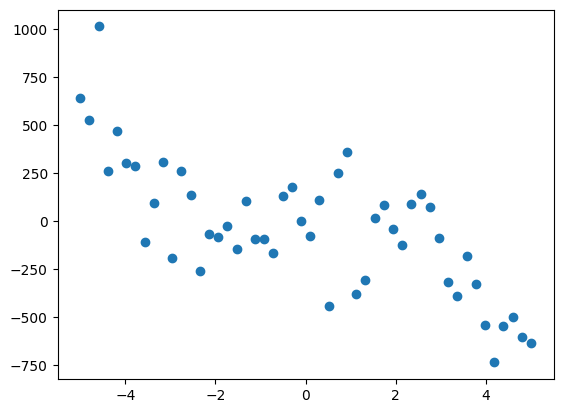

In [472]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

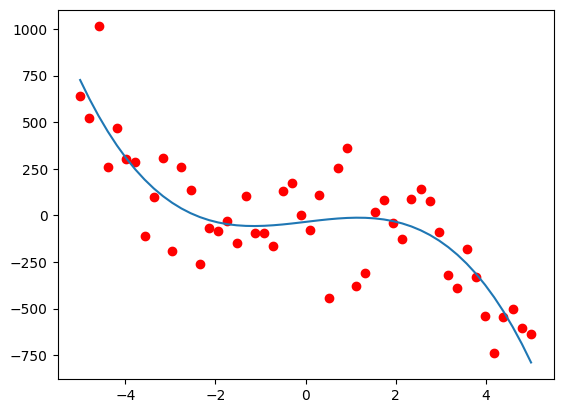

In [473]:
def linear_regression(x_, y_, degree_):
    poly_ = PolynomialFeatures(degree=degree_, include_bias=True)
    phi_ = np.array(poly_.fit_transform(x_))
    w_ = np.dot(linalg.pinv(phi_), y_)
    return np.dot(phi_, w_)

plt.plot(X, y, 'ro')
plt.plot(X, linear_regression(X, y, 3))
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

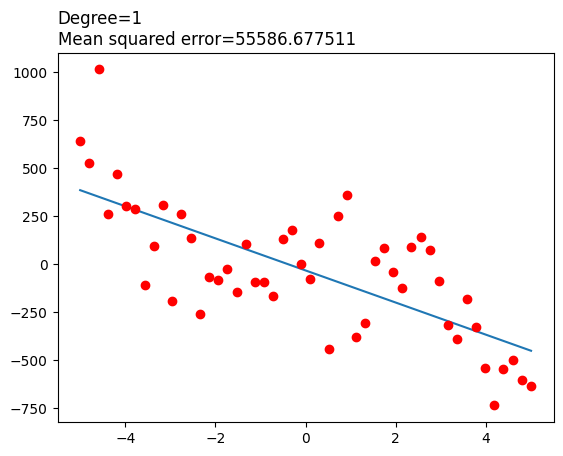

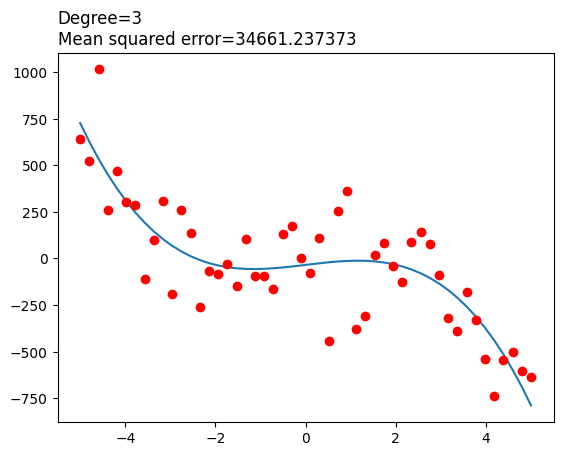

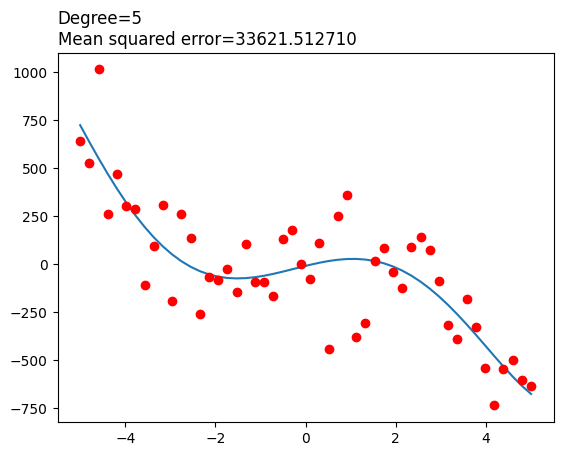

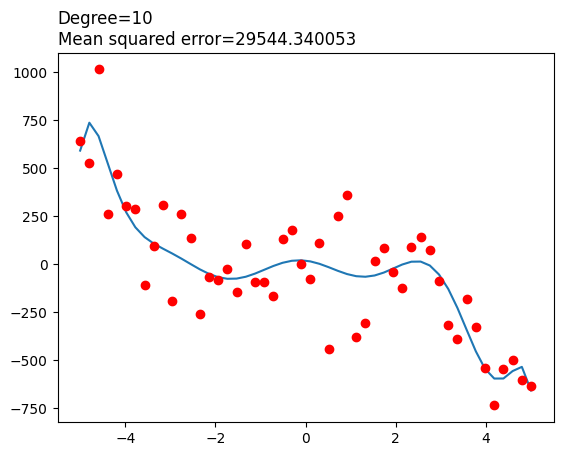

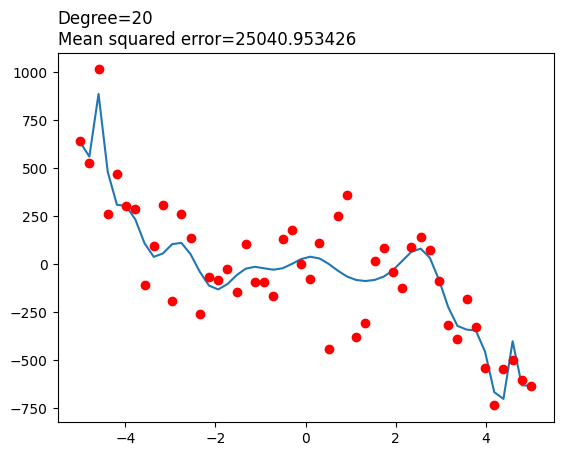

In [474]:
degrees = [1, 3, 5, 10, 20]

for degree in degrees:
    y_predicted = linear_regression(X, y, degree)
    plt.plot(X, y_predicted)
    plt.plot(X, y, "ro")
    plt.title("Degree={}\nMean squared error={:.6f}".format(degree, mean_squared_error(y, y_predicted)), loc='left')
    plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

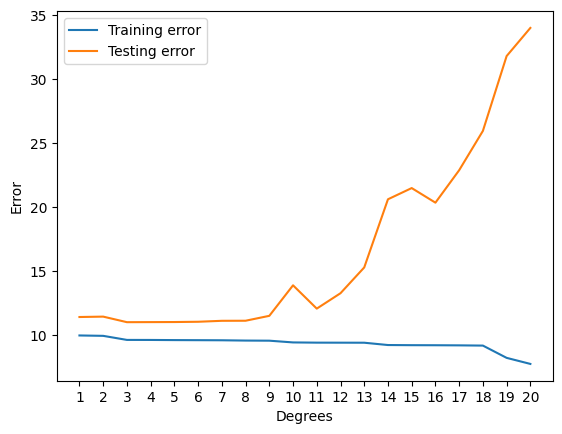

In [475]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)
degrees = range(1, 20 + 1)

train_errors = []
test_errors = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    PHI = poly.fit_transform(X_train)
    w = np.dot(linalg.pinv(PHI), y_train)
    y_predicted_train = np.dot(PHI, w)

    PHI = poly.fit_transform(X_test)
    y_predicted_test = np.dot(PHI, w)

    train_errors.append(np.log(mean_squared_error(y_train, y_predicted_train)))
    test_errors.append(np.log(mean_squared_error(y_test, y_predicted_test)))

plt.plot(degrees, train_errors, label="Training error")
plt.plot(degrees, test_errors, label="Testing error")
plt.xlabel("Degrees")
plt.ylabel("Error")
plt.xticks(degrees)
plt.legend(loc="upper left")
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](https://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

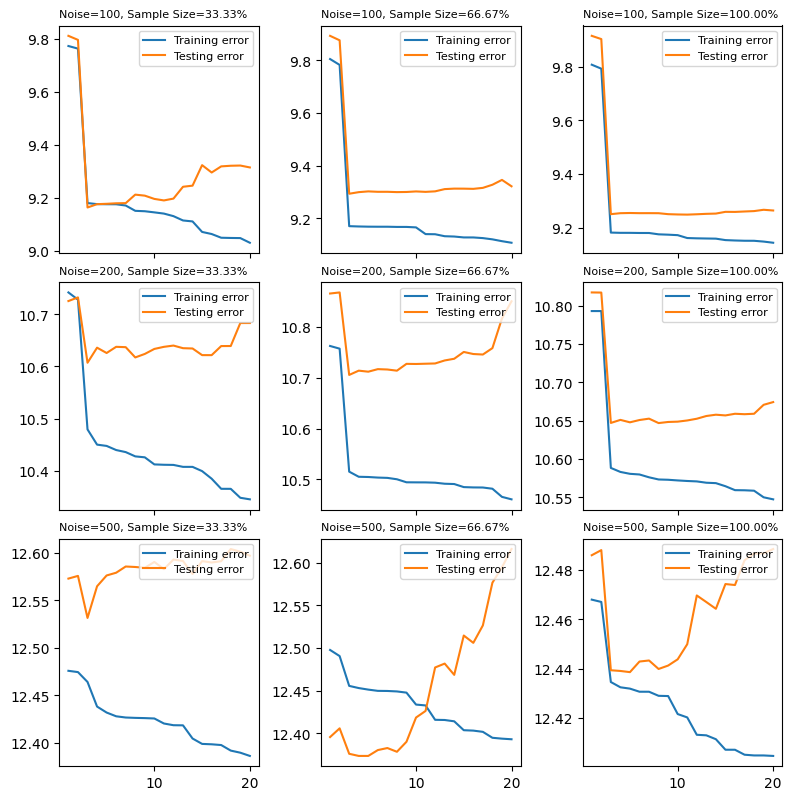

In [476]:
import random

N_modifiers = [1/3, 2/3, 1]
noises = [100, 200, 500]

degrees = range(1, 20 + 1)
N = 1000

X = make_instances(-5, 5, N)
X_train, X_test = train_test_split(X, train_size=0.5, test_size=0.5)
data = dict()

for noise in noises:
    y_train = {k[0]: v[0] for k, v in zip(X_train, make_labels(X_train, f, noise))}
    y_test = {k[0]: v[0] for k, v in zip(X_test, make_labels(X_test, f, noise))}

    for N_modifier in N_modifiers:
        y_train_sample_keys = random.sample(sorted(y_train), int(len(y_train) * N_modifier))
        y_test_sample_keys = random.sample(sorted(y_test), int(len(y_test) * N_modifier))

        y_train_sample = {k: y_train[k] for k in y_train_sample_keys}
        y_test_sample = {k: y_test[k] for k in y_test_sample_keys}

        data[(noise, N_modifier)] = {
            "train_input": np.array([np.array([x_]) for x_ in y_train_sample.keys()]),
            "train_output": np.array([np.array([x_]) for x_ in y_train_sample.values()]),
            "test_input": np.array([np.array([x_]) for x_ in y_test_sample.keys()]),
            "test_output": np.array([np.array([x_]) for x_ in y_test_sample.values()]),
        }

fig, axs = plt.subplots(3, 3, sharex="all", figsize = (8,8))
fig.tight_layout()
i, j = 0, 0

for key in data.keys():
    train_input = data[key]["train_input"]
    train_output = data[key]["train_output"]
    test_input = data[key]["test_input"]
    test_output = data[key]["test_output"]

    train_errors = []
    test_errors = []
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree, include_bias=True)

        PHI = poly.fit_transform(train_input)
        w = np.dot(linalg.pinv(PHI), train_output)
        y_predicted_train = np.dot(PHI, w)

        PHI = poly.fit_transform(test_input)
        y_predicted_test = np.dot(PHI, w)

        train_errors.append(np.log(mean_squared_error(train_output, y_predicted_train)))
        test_errors.append(np.log(mean_squared_error(test_output, y_predicted_test)))

    axs[i, j].plot(degrees, train_errors, label="Training error")
    axs[i, j].plot(degrees, test_errors, label="Testing error")
    axs[i, j].set_title("Noise={}, Sample Size={:.2f}%".format(key[0], key[1] * 100), fontsize=8, loc="left")
    axs[i, j].legend(loc="upper right", fontsize=8)

    j += 1
    if j % 3 == 0:
        i += 1
        j = 0

plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [477]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

poly = PolynomialFeatures(degree=3, include_bias=True)
PHI = np.array(poly.fit_transform(X))

alphas = [0, 1, 10]
I = np.identity(4)
I[0][0] = 0

for alpha in alphas:
    w = np.dot(
        np.dot(
            linalg.inv(
                np.add(
                    np.dot(np.transpose(PHI), PHI),
                    np.dot(alpha, I))
                ), np.transpose(PHI)
        ), y
    )

    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [478]:
from sklearn.linear_model import Ridge

PHI = np.array(poly.fit_transform(X))

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(PHI, y)

    w = [clf.intercept_]
    w.extend(clf.coef_[1:])
    print(w)

[3.9999999999999645, -5.9166666666665595, 3.374999999999939, -0.45833333333332404]
[3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129]
[2.494441843122973, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

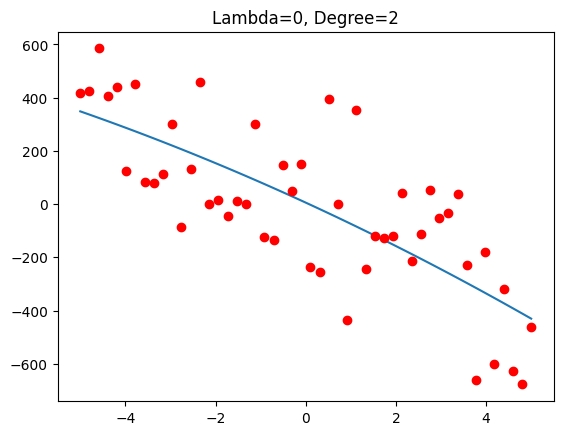

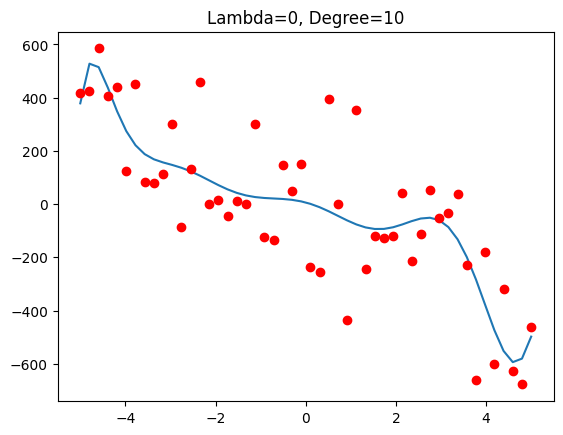

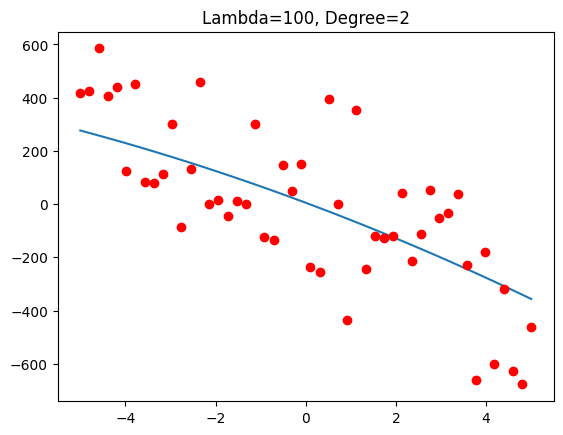

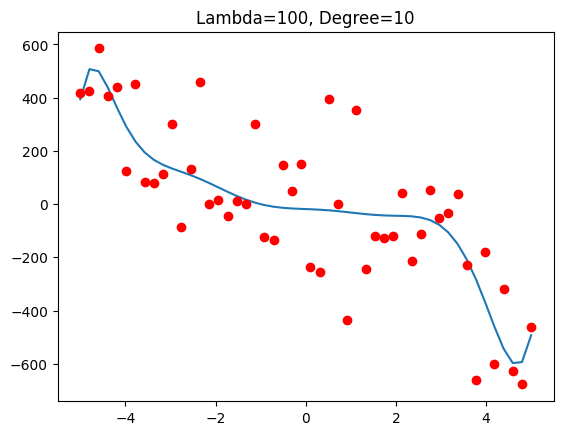

In [479]:
N = 50
X = make_instances(-5, 5, N)
y = make_labels(X, f, 200)

lambdas = [0, 100]
degrees = [2, 10]

for lambda_ in lambdas:
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        PHI = np.array(poly.fit_transform(X))

        clf = Ridge(alpha=lambda_)
        clf.fit(PHI, y)

        y_predicted = clf.predict(PHI)

        plt.title("Lambda={}, Degree={}".format(lambda_, degree))
        plt.plot(X, y_predicted)
        plt.plot(X, y, "ro")
        plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


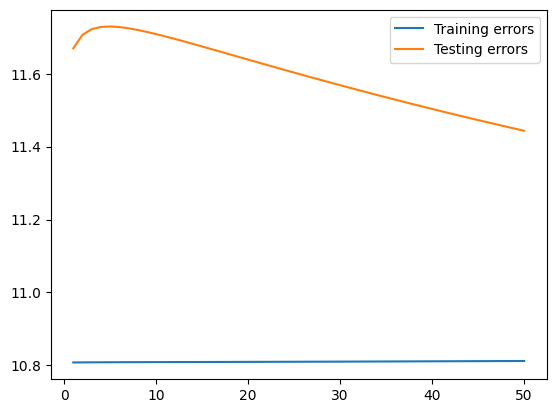

In [513]:
N = 50
X = make_instances(-5, 5, N)
y = make_labels(X, f, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

lambdas = range(1, 50 + 1)

train_errors = []
test_errors = []
for lambda_ in lambdas:
    poly = PolynomialFeatures(degree=10, include_bias=True)
    PHI = np.array(poly.fit_transform(X_train))

    clf = Ridge(alpha=lambda_)
    clf.fit(PHI, y_train)

    y_train_predicted = clf.predict(PHI)

    PHI = np.array(poly.fit_transform(X_test))
    y_test_predicted = clf.predict(PHI)

    train_errors.append(np.log(mean_squared_error(y_train, y_train_predicted)))
    test_errors.append(np.log(mean_squared_error(y_test, y_test_predicted)))

plt.plot(lambdas, train_errors, label="Training errors")
plt.plot(lambdas, test_errors, label="Testing errors")
plt.legend(loc="upper right")
plt.show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [481]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

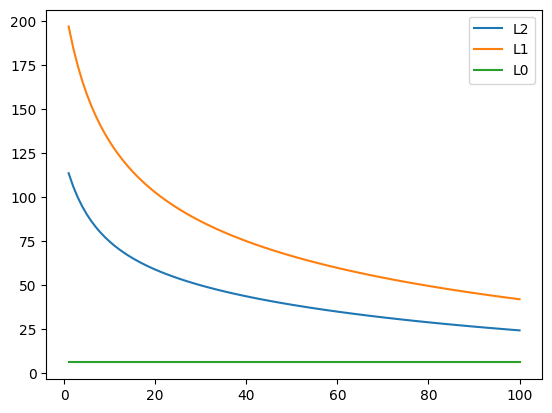

In [526]:
from sklearn.linear_model import Ridge

N = 50
noise = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

poly = PolynomialFeatures(degree=5, include_bias=True)
lambdas = range(1, 100 + 1)

l2_weights = []
l1_weights = []
l0_weights = []
for lambda_ in lambdas:
    PHI = np.array(poly.fit_transform(X_train))

    clf = Ridge(alpha=lambda_)
    clf.fit(PHI, y_test)

    y_train_predicted = clf.predict(PHI)

    PHI = np.array(poly.fit_transform(X_test))
    y_test_predicted = clf.predict(PHI)

    w = [clf.intercept_[0]]
    w.extend([c for c in clf.coef_[0]])
    w = np.array(w)

    l2_weights.append(linalg.norm(w))
    l1_weights.append(linalg.norm(w, 1))
    l0_weights.append(nonzeroes(w))

plt.plot(lambdas, l2_weights, label="L2")
plt.plot(lambdas, l1_weights, label="L1")
plt.plot(lambdas, l0_weights, label="L0")
plt.legend(loc="upper right")
plt.show()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

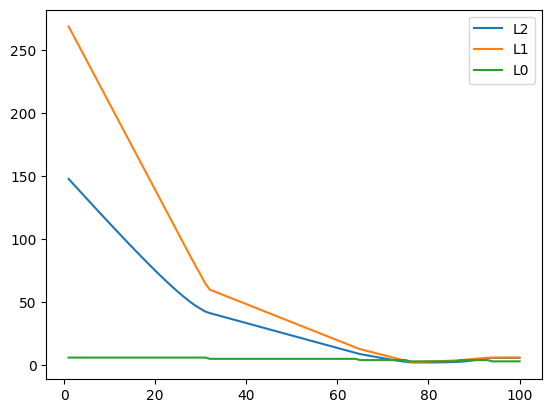

In [529]:
import warnings

from sklearn.linear_model import Lasso

warnings.filterwarnings("ignore")

N = 50
noise = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

poly = PolynomialFeatures(degree=5, include_bias=True)
lambdas = range(1, 100 + 1)

l2_weights = []
l1_weights = []
l0_weights = []
for lambda_ in lambdas:
    PHI = np.array(poly.fit_transform(X_train))

    clf = Lasso(alpha=lambda_)
    clf.fit(PHI, y_test)

    y_train_predicted = clf.predict(PHI)

    PHI = np.array(poly.fit_transform(X_test))
    y_test_predicted = clf.predict(PHI)

    w = [clf.intercept_[0]]
    w.extend(clf.coef_)
    w = np.array(w)

    l2_weights.append(linalg.norm(w))
    l1_weights.append(linalg.norm(w, 1))
    l0_weights.append(nonzeroes(w))

plt.plot(lambdas, l2_weights, label="L2")
plt.plot(lambdas, l1_weights, label="L1")
plt.plot(lambdas, l0_weights, label="L0")
plt.legend(loc="upper right")
plt.show()


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [484]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * exam_influence + (grade_in_highschool / 5.0)
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

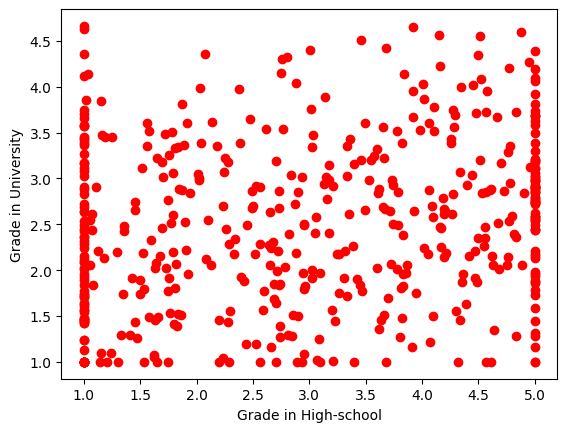

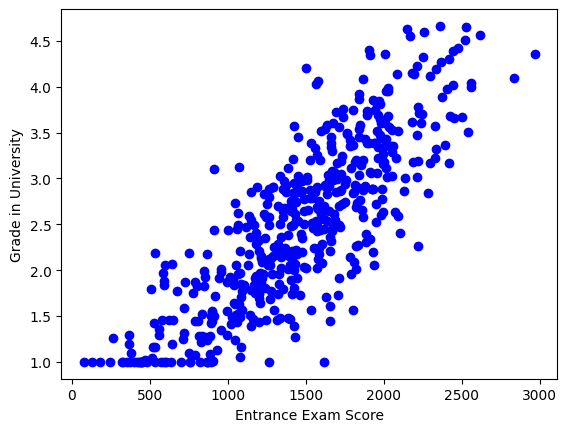

In [485]:
plt.plot(grade_in_highschool, grades_y, "ro")
plt.xlabel("Grade in High-school")
plt.ylabel("Grade in University")
plt.show()
plt.plot(exam_score, grades_y, "bo")
plt.xlabel("Entrance Exam Score")
plt.ylabel("Grade in University")
plt.show()


### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

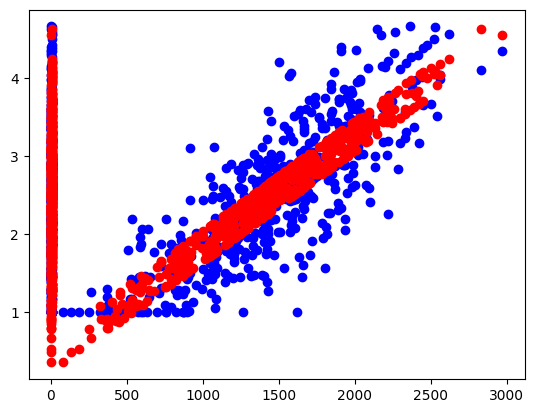

In [486]:
grades_X_train, grades_X_test, grades_y_train, grades_y_test = train_test_split(grades_X, grades_y, train_size=0.5, test_size=0.5)

clf = Ridge(0.01)
clf.fit(grades_X, grades_y)

grades_y_predicted = clf.predict(grades_X)
plt.plot(grades_X, grades_y, "bo")
plt.plot(grades_X, grades_y_predicted, "ro")
plt.show()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

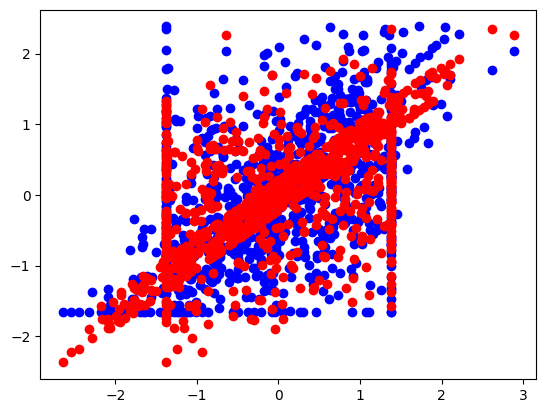

w: [8.62551331e-17] [[0.81630375 0.15167761]]


In [487]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(np.array(grades_y).reshape(-1, 1))

clf = Ridge(0.01)
clf.fit(grades_X_fixed, grades_y_fixed)

grades_y_predicted = clf.predict(grades_X_fixed)
plt.plot(grades_X_fixed, grades_y_fixed, "bo")
plt.plot(grades_X_fixed, grades_y_predicted, "ro")
plt.show()

print("w:", clf.intercept_, clf.coef_)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [488]:
grades_X_fixed = scaler.fit_transform(grades_X)
grades_X_fixed_collinear = np.array([np.append(x, x[1]) for x in grades_X_fixed])

grades_y_fixed = scaler.fit_transform(np.array(grades_y).reshape(-1, 1))


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

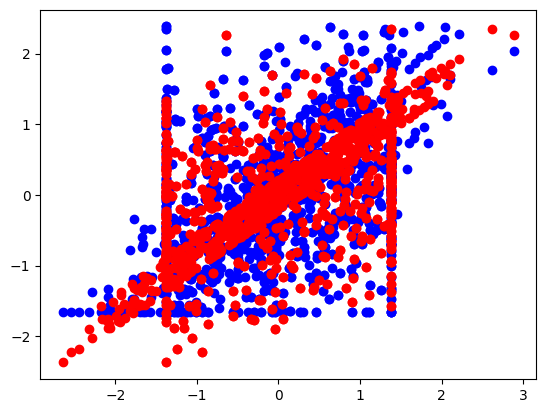

w: [8.07031579e-17] [[0.81630364 0.07583957 0.07583957]]


In [489]:
clf = Ridge(0.01)
clf.fit(grades_X_fixed_collinear, grades_y_fixed)

grades_y_predicted = clf.predict(grades_X_fixed_collinear)
plt.plot(grades_X_fixed_collinear, grades_y_fixed, "bo")
plt.plot(grades_X_fixed_collinear, grades_y_predicted, "ro")
plt.show()

print("w:", clf.intercept_, clf.coef_)


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [490]:
coefficients = []
intercepts = []

for _ in range(10):
    X_1, X_2, y_1, y_2 = train_test_split(grades_X_fixed_collinear, grades_y_fixed, test_size=0.5, train_size=0.5)

    clf_1 = Ridge(0.01)
    clf_1.fit(X_1, y_1)
    y_1_predicted = clf_1.predict(X_1)

    clf_2 = Ridge(1000)
    clf_2.fit(X_2, y_2)
    y_2_predicted = clf_2.predict(X_2)

    coefficients.append(np.append(clf_1.coef_, clf_2.coef_))
    intercepts.append(np.append(clf_1.intercept_, clf_2.intercept_))

    print("lambda=0.01", clf_1.intercept_, clf_1.coef_)
    print("lambda=1000", clf_2.intercept_, clf_2.coef_)
    print()

intercepts_std = np.std(intercepts, axis=0)
coefficients_std = np.std(coefficients, axis=0)

print("Lambda=0.01 weights std: {} {}".format(intercepts_std[0], coefficients_std[:3]))
print("Lambda=1000 weights std: {} {}".format(intercepts_std[1], coefficients_std[3:]))


lambda=0.01 [0.02152062] [[0.80739011 0.0761075  0.0761075 ]]
lambda=1000 [-0.03106416] [[0.16837778 0.04200572 0.04200572]]

lambda=0.01 [0.00921447] [[0.814158   0.07673386 0.07673386]]
lambda=1000 [0.02709743] [[0.16675609 0.03992155 0.03992155]]

lambda=0.01 [-0.01820559] [[0.83265053 0.07483515 0.07483515]]
lambda=1000 [0.04983691] [[0.16232085 0.03253696 0.03253696]]

lambda=0.01 [0.01261939] [[0.79735626 0.08013669 0.08013669]]
lambda=1000 [0.02386182] [[0.17099764 0.03987356 0.03987356]]

lambda=0.01 [0.00283109] [[0.81845427 0.04525193 0.04525193]]
lambda=1000 [-0.01783093] [[0.15003014 0.03454006 0.03454006]]

lambda=0.01 [-0.04553636] [[0.80086373 0.0614553  0.0614553 ]]
lambda=1000 [0.05176755] [[0.17269709 0.04318487 0.04318487]]

lambda=0.01 [0.00861207] [[0.81216485 0.06648337 0.06648337]]
lambda=1000 [-0.02349788] [[0.1670921 0.0357689 0.0357689]]

lambda=0.01 [-0.01197704] [[0.81501911 0.04444567 0.04444567]]
lambda=1000 [-0.05136038] [[0.16044761 0.05071806 0.05071806

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.